In [1]:
%load_ext autoreload
%autoreload
from trafpy_vectorised_packer.plotting import PlotAesthetics
from trafpy_vectorised_packer.utils import load_ramp_cluster_environment_metrics_from_wandb_sweep

from collections import defaultdict
from sqlitedict import SqliteDict
import pprint
import glob
import os
import time
import pandas as pd
import numpy as np
import scipy.stats as st
import sigfig

import gzip
import pickle

from omegaconf import OmegaConf
from functools import reduce

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [2]:
%autoreload

agent_to_sweep = {
    
    # # not tracking jsd
    # 'Original Packer': 'ong/trafpy_vectorised_packer-scripts/wlrqqs5o',
    # 'Vectorised Packer': 'ong/trafpy_vectorised_packer-scripts/13iaflcq',
    
    # tracking jsd
    'Original Packer': 'ong/trafpy_vectorised_packer-scripts/7iy53vmn',
    'Vectorised Packer': 'ong/trafpy_vectorised_packer-scripts/0je8w7wf',
    
}


keys_to_ignore = None # for ignoring data not needed for plotting
key_substrings_to_remove = None # for tidying up keys

verbose = True




agent_results_dict = load_ramp_cluster_environment_metrics_from_wandb_sweep(agent_to_sweep, keys_to_ignore=keys_to_ignore, key_substrings_to_remove=key_substrings_to_remove, verbose=verbose)
        
# convert dicts to dataframes
print(f'\nLoaded stats:')
for key, val in agent_results_dict.items():
    print(f'key {key} -> {len(val)} vals')
agent_results_df = pd.DataFrame(agent_results_dict)
display(agent_results_df)


Agent Original Packer sweep <Sweep ong/trafpy_vectorised_packer-scripts/7iy53vmn (FINISHED)> parameters:
	experiment.seed:
		{'values': [0, 1, 2, 4]}
	generator.flow_packer_cls:
		{'value': 'trafpy.generator.src.packers.flow_packer_v1.FlowPackerV1'}
	network.num_eps:
		{'values': [8, 16, 32, 64, 128, 256, 512]}

Loading data from 28 runs...

Recorded keys: {'_step', 'summary/num_flows_packed', 'summary/packing_time_s', '_timestamp', 'summary/packing_jensen_shannon_distance', '_runtime', 'figs/node_dist_fig_0'}
Ignored keys: set()
Unique metric types: {'Original Packer': {'_step', 'summary/num_flows_packed', 'summary/packing_time_s', '_timestamp', 'summary/packing_jensen_shannon_distance', '_runtime', 'figs/node_dist_fig_0'}}
last key: _timestamp | val: [1665765423.7815695] | len val: 1
Loaded data for run 1 of 28 (<Run ong/trafpy_vectorised_packer-scripts/z0jq3n0m (finished)>) in 0.401.

Recorded keys: {'_step', 'summary/num_flows_packed', 'summary/packing_time_s', '_timestamp', 'summ

,summary/packing_time_s,_step,figs/node_dist_fig_0,_runtime,summary/packing_jensen_shannon_distance,summary/num_flows_packed,_timestamp,config,experiment.seed,generator.flow_packer_cls,network.num_eps
0,542571.086367,0,"{'_type': 'image-file', 'format': 'png', 'heig...",542636.441504,0.008008,1310720,1.665765e+09,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",4,trafpy.generator.src.packers.flow_packer_v1.Fl...,512
1,27519.140872,0,{'path': 'media/images/figs/node_dist_fig_0_0_...,27560.491264,0.007360,327680,1.665250e+09,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",4,trafpy.generator.src.packers.flow_packer_v1.Fl...,256
2,1417.869930,0,"{'format': 'png', 'height': 400, 'path': 'medi...",1454.608890,0.007590,81920,1.665223e+09,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",4,trafpy.generator.src.packers.flow_packer_v1.Fl...,128
3,91.142809,0,"{'width': 400, '_type': 'image-file', 'format'...",130.292672,0.010877,20480,1.665222e+09,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",4,trafpy.generator.src.packers.flow_packer_v1.Fl...,64
4,6.187699,0,"{'width': 400, '_type': 'image-file', 'format'...",40.935269,0.011231,5120,1.665222e+09,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",4,trafpy.generator.src.packers.flow_packer_v1.Fl...,32
5,0.478277,0,{'path': 'media/images/figs/node_dist_fig_0_0_...,34.760177,0.004187,2490,1.665221e+09,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",4,trafpy.generator.src.packers.flow_packer_v1.Fl...,16
6,0.140823,0,"{'_type': 'image-file', 'format': 'png', 'heig...",34.433304,0.000920,2344,1.665221e+09,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",4,trafpy.generator.src.packers.flow_packer_v1.Fl...,8
7,462711.189452,0,{'path': 'media/images/figs/node_dist_fig_0_0_...,462772.260620,0.006171,1310720,1.665684e+09,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",2,trafpy.generator.src.packers.flow_packer_v1.Fl...,512
8,28317.990860,0,"{'width': 400, '_type': 'image-file', 'format'...",28361.269372,0.005788,327680,1.665250e+09,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",2,trafpy.generator.src.packers.flow_packer_v1.Fl...,256
9,1607.549500,0,"{'size': 46168, 'width': 400, '_type': 'image-...",1642.695078,0.007889,81920,1.665223e+09,"{""wandb"": {""value"": {""init"": {""entity"": ""ong"",...",2,trafpy.generator.src.packers.flow_packer_v1.Fl...,128


In [65]:
%autoreload




def lineplot(df, metric):
    print(f'Plotting metric {metric} -> min={np.min(df[metric])} | max={np.max(df[metric])} | mean={np.mean(df[metric])}')
    
    
    
    
    
    
    
    aesthetics = PlotAesthetics()
    aesthetics.set_icml_paper_plot_aesthetics() # paper training curve

    estimator = np.mean # np.mean np.median

    # scaling_factor = 0.5
    scaling_factor = 0.75
    # width_scaling_factor = 0.5
    # height_scaling_factor = 0.6
    width_scaling_factor = 1
    height_scaling_factor = 1

    # xaxis = episode_stats_df['eval_loop.env.jobs_config.job_interarrival_time_dist.val']
    xaxis = agent_results_df['network.num_eps']
    xaxis_label = '\# Network Nodes $|N|$'

    metric_to_yaxis_label = {
        'summary/packing_time_s': 'Packing Time (Hours)', # will convert time units automatically ['Seconds', 'Minutes', 'Hours', 'Days']
        'summary/packing_jensen_shannon_distance': 'Packing JSD',
    }

    hue = 'generator.flow_packer_cls'

    # style = None
    style = 'generator.flow_packer_cls'
    
    # dashes = True
    dashes = False
    
    linewidth = aesthetics.linewidth

    # errorbar = ('ci', 95)
    errorbar = 95
    # errorbar = 'sd'

    # markers = False
    markers = True

    # legend = 'auto'
    legend = None

    xlim = None
    # xlim = [500, 1.2e3]

    ylim = None
    # ylim = [0, 0.5]

    xaxis_label_style = 'sci' # sci plain
    # yaxis_label_style = 'sci' # sci plain
    yaxis_label_style = 'plain' # sci plain

    # ylog = True
    ylog = False
    xlog = True
    # xlog = False
    
    # set hue order for colour palette
    hue_order = list(agent_to_sweep.keys())
    # hue_order.extend(list(agent_to_sweep.keys()))
    print(f'hue_order: {hue_order}')
    
    # generate colour for each agent given hue order and colour palette
    _palette = iter(sns.color_palette(aesthetics.palette))
    palette = {agent: next(_palette) for agent in hue_order}
    print(palette)

    
    agent_to_extrapolated_df = None
#     agent_to_extrapolated_dict = defaultdict(list)
#     # agent_to_extrapolated_dict['num_eps'].append(256)
#     # agent_to_extrapolated_dict['summary/packing_time_s'].append(28899.86)
#     agent_to_extrapolated_dict['num_eps'].append(512)
#     # agent_to_extrapolated_dict['summary/packing_time_s'].append(650000)
#     agent_to_extrapolated_dict['summary/packing_time_s'].append(462711)
#     agent_to_extrapolated_dict['num_eps'].append(1024)
#     # agent_to_extrapolated_dict['summary/packing_time_s'].append(15280000)
#     agent_to_extrapolated_dict['summary/packing_time_s'].append(12280000)
#     agent_to_extrapolated_df = pd.DataFrame(agent_to_extrapolated_dict)
    
    
    # # HACK to make markers with different sizes for packers
    # packer_to_marker = {'trafpy.generator.src.packers.flow_packer_v1.FlowPackerV1': 'o', 'trafpy_vectorised_packer.vectorised_flow_packer.VectorisedFlowPacker': 'x'}
    # packer_to_marker_size = {'trafpy.generator.src.packers.flow_packer_v1.FlowPackerV1': 20, 'trafpy_vectorised_packer.vectorised_flow_packer.VectorisedFlowPacker': 5}
    # packer_to_colour = {'trafpy.generator.src.packers.flow_packer_v1.FlowPackerV1': palette['Original Packer'], 'trafpy_vectorised_packer.vectorised_flow_packer.VectorisedFlowPacker': palette['Vectorised Packer']}
    
    # alpha = 1
    alpha = 0.5
    
    
    
    
    
    
    
    
    
    
    
    if 'Time' in metric_to_yaxis_label[metric]:
        units = metric_to_yaxis_label[metric].split('(')[-1].split(')')[0]
        _yaxis = np.array(df[metric])
        if agent_to_extrapolated_df is not None:
            _extrapolated_yaxis = np.array(agent_to_extrapolated_df[metric])
        if units == 'Seconds':
            yaxis = _yaxis
            if agent_to_extrapolated_df is not None:
                extrapolated_yaxis = _extrapolated_yaxis
        elif units == 'Minutes':
            yaxis = _yaxis / 60
            if agent_to_extrapolated_df is not None:
                extrapolated_yaxis = _extrapolated_yaxis / 60
        elif units == 'Hours':
            yaxis = _yaxis / 60
            yaxis /= 60
            if agent_to_extrapolated_df is not None:
                extrapolated_yaxis = _extrapolated_yaxis / 60
                extrapolated_yaxis /= 60
        elif units == 'Days':
            yaxis = _yaxis / 60
            yaxis /= 60
            yaxis /= 24
            if agent_to_extrapolated_df is not None:
                extrapolated_yaxis = _extrapolated_yaxis / 60
                extrapolated_yaxis /= 60
                extrapolated_yaxis /= 24
        else:
            raise Exception(f'Unrecognised Time yaxis label units {units}')
    else:
        yaxis = metric
        if agent_to_extrapolated_df is not None:
            extrapolated_yaxis = metric
    
    f, ax = plt.subplots(figsize=aesthetics.get_standard_fig_size(scaling_factor=scaling_factor, width_scaling_factor=width_scaling_factor, height_scaling_factor=height_scaling_factor))
    
    
    # if 'jensen_shannon_distance' in metric:
    #     # draw scatter plot separately
    #     for packer in np.unique(df[hue]):
    #         # _data = df.groupby([hue]).get_group(packer)
    #         _data = df.groupby([hue, 'experiment.seed'])
    #         # y = df.groupby([hue, 'experiment.seed'])[metric]
    #         for key, item in _data:
    #             print(f'key: {key}')
    #             print(f'item: {item}')
    #         # _data = df.groupby([hue, 'experiment.seed']).get_group(packer)
    #         print(f'packer: {packer}')
    #         print(f'_data: {_data}')
    #         eps = set()
    #         for vals in _data['network.num_eps']:
    #             for ep in vals[-1]:
    #                 if ep not in eps:
    #                     eps.add(ep)
    #         sns.scatterplot(data=None,
    #                         # x=xaxis,
    #                         # x=_data['network.num_eps'],
    #                         x=list(eps),
    #                         # y=yaxis,
    #                         y=_data[metric].mean(),
    #                         legend=False,
    #                         size=packer_to_marker_size[packer],
    #                         marker=packer_to_marker[packer],
    #                         color=packer_to_colour[packer],
    #                         # hue='experiment.seed',
    #                        )
    #     g = sns.lineplot(data=df, 
    #                  x=xaxis,
    #                  y=yaxis, 
    #                  hue=hue, 
    #                  style=style,
    #                  dashes=dashes,
    #                  markers=False,
    #                  linewidth=linewidth,
    #                  legend=legend,
    #                  ci=errorbar,
    #                 )
    # else:
    #     g = sns.lineplot(data=df, 
    #                      x=xaxis, 
    #                      y=yaxis, 
    #                      hue=hue, 
    #                      style=style,
    #                      dashes=dashes,
    #                      markers=markers,
    #                      linewidth=linewidth,
    #                      legend=legend,
    #                      ci=errorbar,
    #                     )
        
        
    g = sns.lineplot(data=df, 
                         x=xaxis, 
                         y=yaxis, 
                         hue=hue, 
                         style=style,
                         dashes=dashes,
                         markers=markers,
                         linewidth=linewidth,
                         legend=legend,
                         ci=errorbar,
                         alpha=alpha,
                        )
        
        
    if agent_to_extrapolated_df is not None:
        plt.plot(agent_to_extrapolated_dict['num_eps'],
                 extrapolated_yaxis,
                 linewidth=linewidth,
                 linestyle='--',
                 color=palette['Original Packer'],
                 label=None,
                )
    if legend is not None:
        handles, lables = g.get_legend_handles_labels()
        for h in handles:
            h.set_markersize(2)
            h.set_linewidth(aesthetics.linewidth)
        # ax.legend(loc='lower right', ncol=1, labelspacing=0.1, columnspacing=6, prop={'size': 6})
        sns.move_legend(ax, 
                        loc='upper center', 
                        bbox_to_anchor=(0.5, 1.3), 
                        ncol=2, 
                        labelspacing=1, 
                        columnspacing=2.5, 
                        prop={'size': 9}, 
                        title=None, 
                        frameon=False,
                        labels=agent_to_sweep.keys(),
                       )
    
    g.set_xlabel(xaxis_label)
    g.set_ylabel(metric_to_yaxis_label[metric])
    # ax.tick_params(axis='both', which='major', pad=2)
    # ax.tick_params(axis='both', which='minor', pad=2)
    ax.tick_params(axis='both', which='major')
    ax.tick_params(axis='both', which='minor')
    ax.xaxis.labelpad = 2
    ax.yaxis.labelpad = 2
    sns.despine(ax=ax) # remove top and right spines
    g.ticklabel_format(style=xaxis_label_style, axis='x', scilimits=(0,0))
    g.ticklabel_format(style=yaxis_label_style, axis='y', scilimits=(0,0))
    if xlog:
        g.set(xscale='log')
    if ylog:
        g.set(yscale='log')
    if xlim is not None:
        plt.xlim(left=xlim[0], right=xlim[1])
    if ylim is not None:
        plt.ylim(bottom=ylim[0], top=ylim[1])
    plt.gcf().patch.set_alpha(0.0)
    plt.show()

Plotting metric summary/packing_time_s -> min=0.13635873794555664 | max=562738.0869071484 | mean=51376.008012906714
hue_order: ['Original Packer', 'Vectorised Packer']
{'Original Packer': (0.00392156862745098, 0.45098039215686275, 0.6980392156862745), 'Vectorised Packer': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549)}


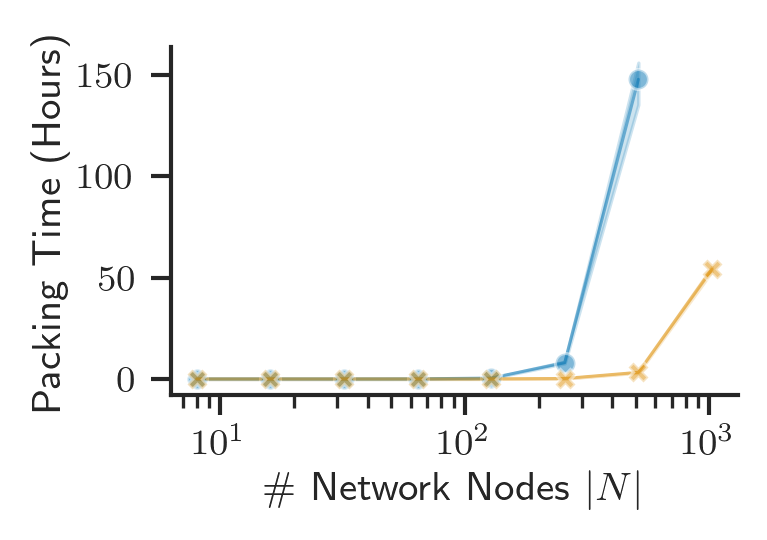

Plotting metric summary/packing_jensen_shannon_distance -> min=0.0007954980005644189 | max=0.011241922844010026 | mean=0.006735792053163295
hue_order: ['Original Packer', 'Vectorised Packer']
{'Original Packer': (0.00392156862745098, 0.45098039215686275, 0.6980392156862745), 'Vectorised Packer': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549)}


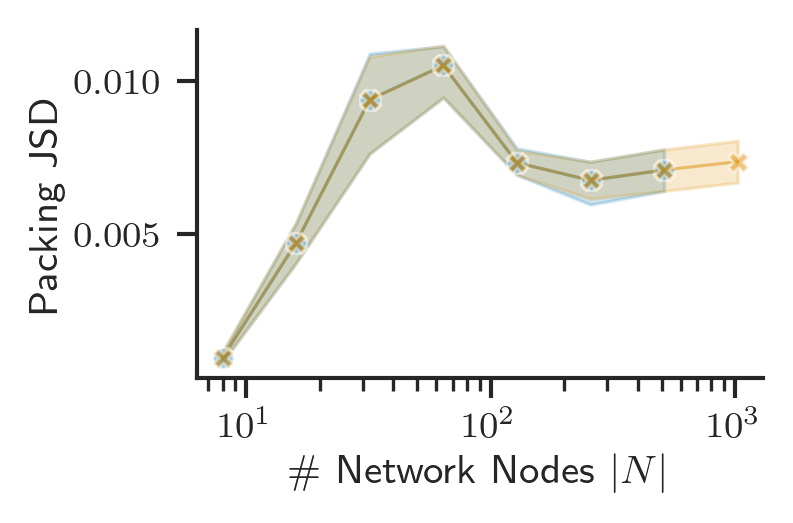

In [66]:
%autoreload

metrics = ['summary/packing_time_s', 'summary/packing_jensen_shannon_distance']
# metrics = ['summary/packing_jensen_shannon_distance']
for metric in metrics:
    lineplot(df=agent_results_df, metric=metric)